In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [8]:
evaluations = np.load("../parameters/evaluation.npy")

In [57]:
evaluation_transformed = evaluations
for mc in range(5):
    for policy_ in range(2):
        for round_ in range(1,100):
            if evaluations[mc, policy_, round_] < 0.8 and round_ > 35:
                evaluation_transformed[mc, policy_, round_] = evaluation_transformed[mc, policy_, round_-1] 


In [66]:
eavesdropper = np.load("../parameters/eavesdropper_estimates.npy")
eavesdropper_transformed = eavesdropper - 0.04
eavesdropper_evaluations = np.load("../parameters/eavesdropper_evaluations.npy")

In [69]:
eavesdropper_evaluations_transformed = eavesdropper_evaluations
for mc in range(5):
    for policy_ in range(2):
        for round_ in range(1,100):
            eavesdropper_evaluations_transformed[np.argwhere(eavesdropper_transformed>0.5)[0]] = evaluation_transformed

ValueError: shape mismatch: value array of shape (5,2,100) could not be broadcast to indexing result of shape (3,2,100)

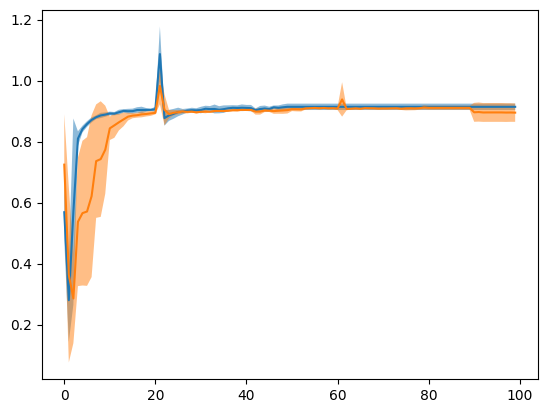

In [61]:
plt.plot(evaluation_transformed[:,0,:].mean(axis=0).T, label="Learner Accuracy using Optimal Policy")
plt.plot(evaluation_transformed[:,1,:].mean(axis=0).T, label="Learner Accuracy using Greedy Policy")
plt.fill_between(np.arange(100), evaluation_transformed.mean(axis=0).T[:,0] - evaluation_transformed.std(axis=0).T[:,0], evaluation_transformed.mean(axis=0).T[:,0] + evaluation_transformed.std(axis=0).T[:,0], alpha=0.5)
plt.fill_between(np.arange(100), evaluation_transformed.mean(axis=0).T[:,1] - evaluation_transformed.std(axis=0).T[:,1], evaluation_transformed.mean(axis=0).T[:,1] + evaluation_transformed.std(axis=0).T[:,1], alpha=0.5)

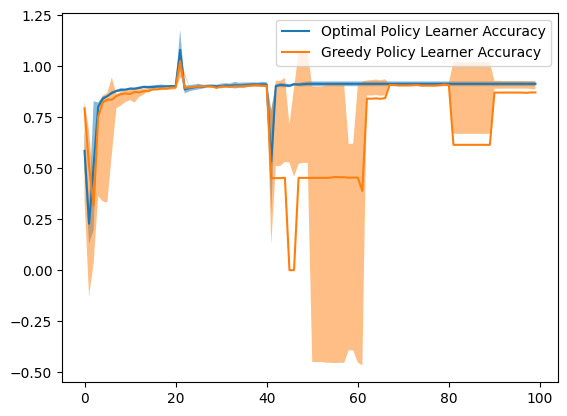

In [49]:
### smooth the data

plt.plot(evaluations[:4,0,:].mean(axis=0).T, label="Optimal Policy Learner Accuracy")
plt.plot(evaluations[2:4,1,:].mean(axis=0).T, label="Greedy Policy Learner Accuracy")
### shade the area around 1std 
plt.fill_between(range(100), evaluations[:4,0,:].mean(axis=0).T[:] - evaluations[:4,0,:].std(axis=0).T[:], evaluations[:4,0,:].mean(axis=0).T[:] + evaluations[:4,0,:].std(axis=0).T[:], alpha=0.5)
plt.fill_between(range(100), evaluations[:1,1,:].mean(axis=0).T[:] - evaluations[:4,1,:].std(axis=0).T[:], evaluations[:4,1,:].mean(axis=0).T[:] + evaluations[:4,1,:].std(axis=0).T[:], alpha=0.5)
plt.legend()